AI ML Certification - Purdue University Online
course end project

In [1]:
import pandas as pd

df=pd.read_csv(r'C:\Users\Maria\Downloads\AAL Sales Analysis\AusApparalSales4thQrt2020.csv')
print(df.head())

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


Structure of the dataset

In [2]:
df.info

<bound method DataFrame.info of              Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]>

In [3]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


checking for missing values

In [4]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [5]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

moving on since none of the data is missing  
Normalizing the Sales and Unit to compare in a fair manner.

Grouping the data for state-wise and group-wise analysis

In [10]:
state_groups_sales=df.groupby(['State','Group'])['Sales'].sum().reset_index()
state_groups_sales.head()

,State,Group,Sales
0,NSW,Kids,18587500
1,NSW,Men,19022500
2,NSW,Seniors,18187500
3,NSW,Women,19172500
4,NT,Kids,5700000


Statistics Summary

In [11]:
sales_stats=df['Sales'].agg(['mean','median','std'])
unit_stats=df['Unit'].agg(['mean','median','std'])
print(sales_stats)
print(unit_stats)

mean      45013.558201
median    35000.000000
std       32253.506944
Name: Sales, dtype: float64
mean      18.005423
median    14.000000
std       12.901403
Name: Unit, dtype: float64


Box plot - Sales, to show median, quartiles and outliers

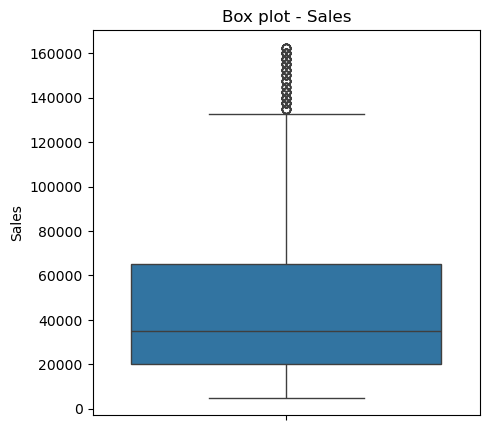

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Sales'])
plt.title('Box plot - Sales')
plt.show()

Box plot - Unit, to show median, quartiles and outliers

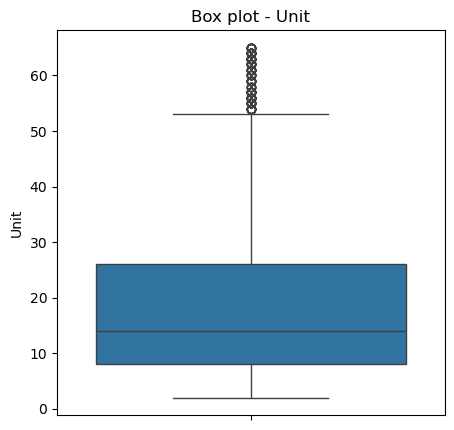

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df['Unit'])
plt.title('Box plot - Unit')
plt.show()

Distribution plot to understand the spread

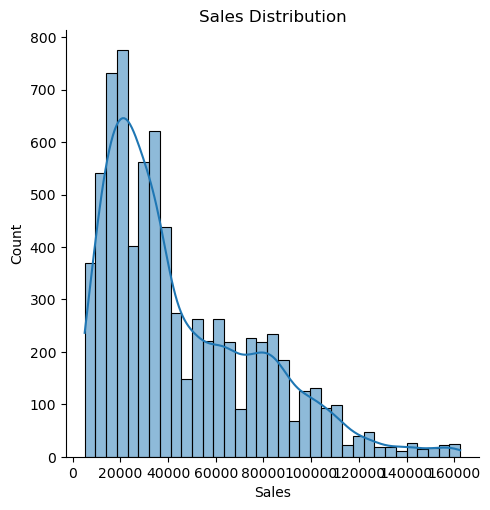

In [18]:
sns.displot(data=df['Sales'],kde=True)
plt.title('Sales Distribution')
plt.show()

Group the data based on the demographics, and provide sales per the group

In [19]:
group_sales=df.groupby('Group')['Sales'].sum().sort_values()
print(group_sales)

Group
Seniors    84037500
Kids       85072500
Women      85442500
Men        85750000
Name: Sales, dtype: int64


Group the data based on the State, and provide sales for each state

In [20]:
state_sales=df.groupby('State')['Sales'].sum().sort_values()
print(state_sales)

State
WA      22152500
NT      22580000
TAS     22760000
QLD     33417500
SA      58857500
NSW     74970000
VIC    105565000
Name: Sales, dtype: int64


Extracting week, Month and Quarter from Date

In [22]:
df['Date']=pd.to_datetime(df['Date'])
df['Week']=df['Date'].dt.isocalendar().week
df['Month']=df['Date'].dt.month
df['Quarter']=df['Date'].dt.quarter
df.head()

,Date,Time,State,Group,Unit,Sales,Sales_norm,Unit_norm,Week,Month,Quarter
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238,40,10,4
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238,40,10,4
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746,40,10,4
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349,40,10,4
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873,40,10,4


Group data based on week

In [24]:
week_sales=df.groupby('Week')['Sales'].sum().sort_values()
print(week_sales)

Week
53    13792500
40    15045000
45    20865000
47    21112500
46    21172500
48    21477500
44    21807500
42    26640000
43    26815000
41    27002500
49    29622500
50    31525000
51    31655000
52    31770000
Name: Sales, dtype: int64


Group data based on month

In [25]:
month_sales=df.groupby('Month')['Sales'].sum().sort_values()
print(month_sales)

Month
11     90682500
10    114290000
12    135330000
Name: Sales, dtype: int64


Group data based on quarter

In [26]:
quarter_sales=df.groupby('Quarter')['Sales'].sum()
print(quarter_sales)

Quarter
4    340302500
Name: Sales, dtype: int64


state wise sales by Group

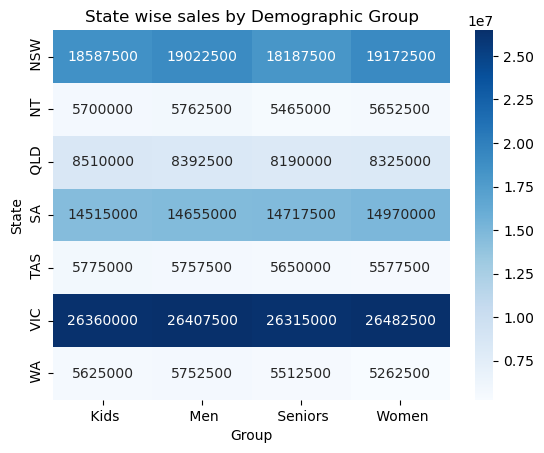

In [31]:
pivot_state_group=df.pivot_table(values='Sales',index='State',columns='Group',aggfunc='sum')
sns.heatmap(data=pivot_state_group,annot=True,fmt='.0f',cmap='Blues')
plt.title('State wise sales by Demographic Group')
plt.show()

Statewise sales

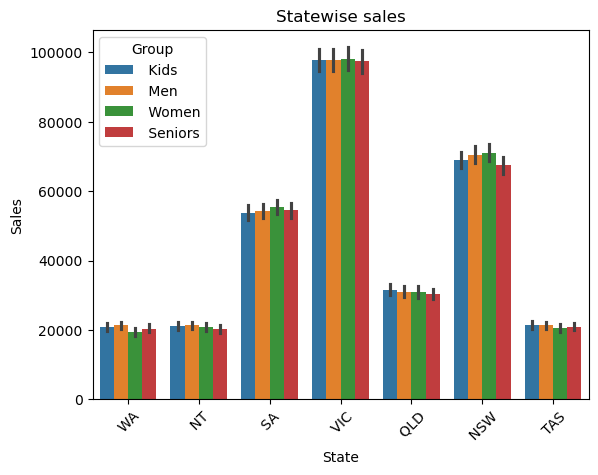

In [32]:
sns.barplot(data=df,x='State',y='Sales',hue='Group')
plt.title('Statewise sales')
plt.xticks(rotation=45)
plt.show()

Daily, Weekly, Monthly, Quarterly Charts

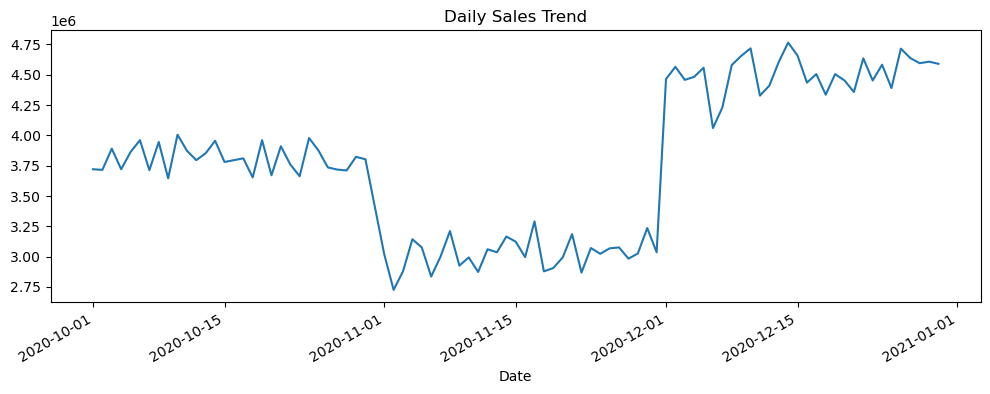

In [41]:
daily=df.groupby(['Date'])['Sales'].sum()
daily.plot(figsize=(12,4),title='Daily Sales Trend')
plt.show()

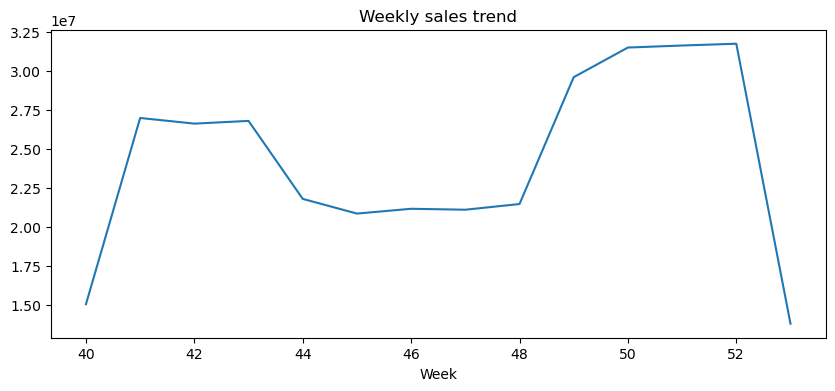

In [40]:
weekly=df.groupby('Week')['Sales'].sum()
weekly.plot(figsize=(10,4),title='Weekly sales trend')
plt.show()

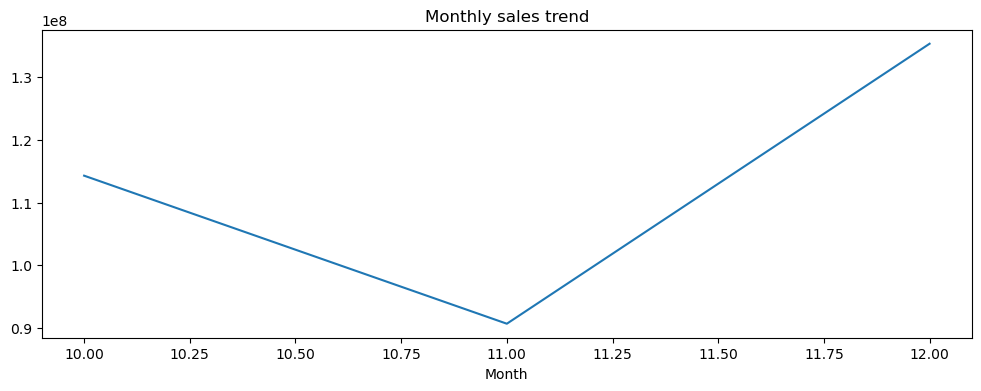

In [39]:
monthly=df.groupby('Month')['Sales'].sum()
monthly.plot(figsize=(12,4),title='Monthly sales trend')
plt.show()

In [48]:
time=df.groupby(['Date','Time'])['Sales'].sum().reset_index()
time.head()

,Date,Time,Sales
0,2020-10-01,Afternoon,1212500
1,2020-10-01,Evening,1282500
2,2020-10-01,Morning,1225000
3,2020-10-02,Afternoon,1275000
4,2020-10-02,Evening,1162500


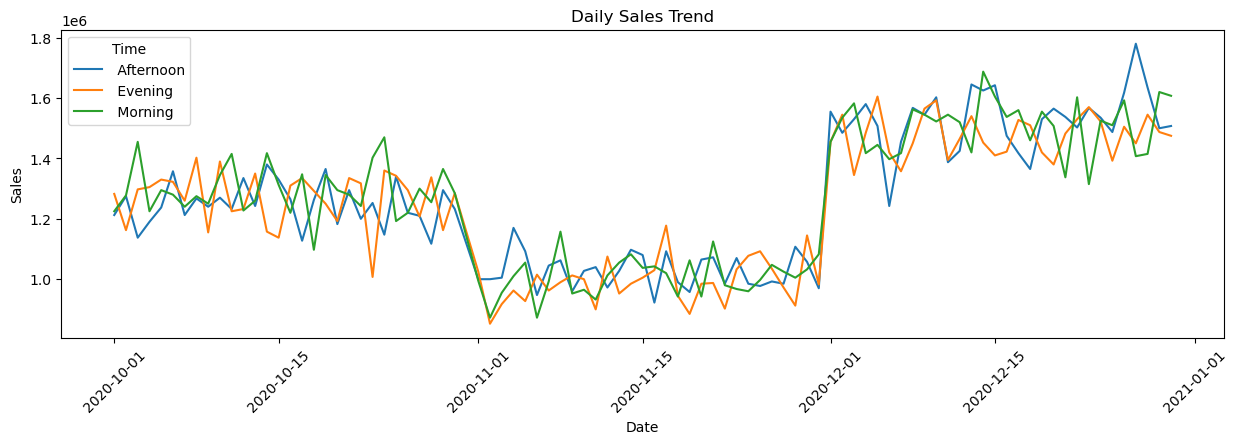

In [56]:
plt.figure(figsize=(15,4))
sns.lineplot(data=time,x='Date',y='Sales',hue='Time')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.show()